# 期权

> 券商是资源的变现，期货是胆量与运气的变现，期权是知识的变现。

**定义**：[期权，是指一种合约，源于十八世纪后期的美国和欧洲市场，该合约赋予持有人在某一特定日期或该日之前的任何时间以固定价格购进或售出一种资产的权利。](期权百度百科 "https://baike.baidu.com/item/%E6%9C%9F%E6%9D%83/317234?fr=aladdin")

![OKEX](image\OKEX.PNG)

期权的交易界面称为T型报价表，以上是[OKEX](OKEX官网 "https://www.okex.me/")的期权合约界面。

其中，

1. 中间那列是**行权价格**。即到期日时执行期权时的价格，在两边可以进行交易。
2. 最上面一行是**到期日**。不同到期日有不同的期权，就和期货一样分为某年某月到期的期货一样。
3. 黑色方框的代表看涨(call)和看跌(put)期权。在其中都可以做买入、卖出操作。
4. 看涨期权与看跌期权中都有买入价与卖出价。即无论是买入或卖出任何行权价格的期权，都会按照相对应的买入价或卖出价进行。

![OKEX-期权递进](image\OKEX-期权递进.png)上图即购买期权时选择的步骤顺序，先选择到期日，再选择行权价格，最后选择看涨看跌、买入卖出。

## 简介

### 案例

>假设以250美元，买入2020-3-6到期、行权价为8750的看涨期权(数据来自之前图第八行)

意味着：我在2020-3-6，有使用8750美金的价格买入1个比特币的权利。

| 最终价格    | 过程             | 最终收益 |
| ----------- | ---------------- | -------- |
| 上涨至9000  | (9000-8750)-250  | 0        |
| 上涨至10000 | (10000-8750)-250 | 1000     |
| 下跌至8000  | 不行使权利       | -250     |
| 下跌至500   | 不行使权利       | -250     |



>假设以215美元，买入2020-3-6到期、行权价为8750的看跌期权

意味着，我在2020-3-6，有使用8750美金的价格卖出1个比特币的权利。

| 最终价格    | 过程            | 最终收益 |
| ----------- | --------------- | -------- |
| 上涨至9000  | 不行使权利      | -215     |
| 上涨至10000 | 不行使权利      | -215     |
| 下跌至8000  | (8750-8000)-215 | 535      |
| 下跌至500   | (8750-500)-215  | 8035     |

而相应的卖出看涨期权和卖出看跌期权就是对应买入的反方。比如卖出看涨期权，在买入方行使权利的时候会亏钱，在第一个案例中价格上涨至10000后，我们需要在这个价格下给予买入方用8750美金购买1个比特币的权利，如此8750-10000+250=-1000，即卖方损失1000美金，而买方不行权的时候收益期权费250美金，卖出看跌期权同理。

[注]：以上未考虑手续费。


### 期权的四种基本交易

|              | 适用行情 | 权利金 |  收益  |  损失  |
| :----------: | :------: | :----: | :----: | :----: |
| 买入看涨期权 |   大涨   |  支付  |  无穷  | 权利金 |
| 买入看跌期权 |   大跌   |  支付  |  无穷  | 权利金 |
| 卖出看涨期权 |  不会涨  |  收取  | 权利金 |  无穷  |
| 卖出看跌期权 |  不会跌  |  收取  | 权利金 |  无穷  |

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pylab import mpl
# import seaborn
# seaborn.set()
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus'] = False

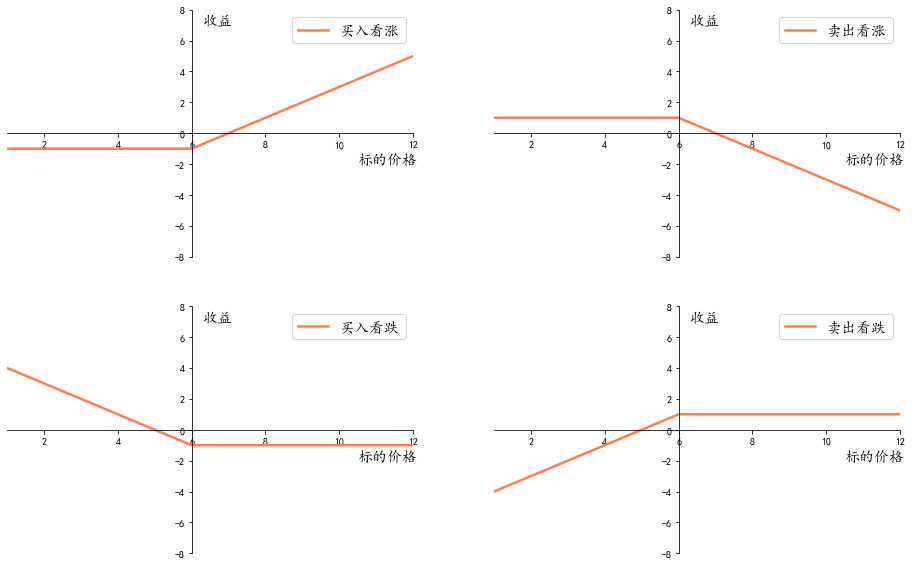

In [135]:
# 计算期权收益
def cal_profit(strike, price, fee, optype, position):
    if optype == 'C':
        if position == 'long':
            profit = np.where(-(strike - price) - fee < -fee, -fee, -(strike - price) - fee)
        else:
            profit = np.where(strike - price + fee > fee, fee, strike - price + fee)
    else:
        if position == 'long':
            profit = np.where(-(strike - price) - fee < -fee, strike - price - fee,  -fee)
        else:
            profit = np.where(strike - price + fee > fee, -(strike - price) + fee, fee)
    return profit

price_list = np.linspace(1.0, 15.0, 15)
long_call = cal_profit(6, price_list, 1, 'C', 'long')
short_call = cal_profit(6, price_list, 1, 'C', 'short')
long_put = cal_profit(6, price_list, 1, 'P', 'long')
short_put = cal_profit(6, price_list, 1, 'P', 'short')

plt.figure(figsize=(16, 10))
i = 1
type_list = ['买入看涨', '卖出看涨', '买入看跌', '卖出看跌']
for _ in [long_call, short_call, long_put, short_put]:
    plt.subplot(2, 2, i) # 子图
    plt.ylim(-8, 8)
    plt.xlim(1, 12)
    plt.plot(price_list, _, 'coral', label=type_list[i-1], lw=2.5)
    # 坐标轴设置
    ax = plt.gca()
    ax.spines['left'].set_position(('data',6))
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.legend(fontsize=15)
    plt.text(6.3, 7, '收益', fontsize=15)
    plt.text(10.5, -2, '标的价格', fontsize=15)
    i += 1

plt.show()

即：

- 买入看涨期权：币价下跌时，最多亏损期权费；币价上涨时，收益无穷大，为本身收益-期权费。
- 卖出看涨期权：币价下跌时，最多赚取期权费；币价上涨时，可能损失无穷大。
- 买入看跌期权：币价上涨时，最多亏损期权费；币价下跌时，跌的越多，收益越多。
- 卖出看跌期权：币价上涨时，最多赚取期权费；币价下跌时，跌的越多，亏得越多。

### 基础术语

**欧式期权**：[指买入期权的一方必须在期权到期日当天才能行使的期权。](欧式期权百度百科 "https://baike.baidu.com/item/%E6%AC%A7%E5%BC%8F%E6%9C%9F%E6%9D%83/263480?fr=aladdin")

**美式期权**：[买方可以在到期日或之前任一交易日提出执行合约。](美式期权百度百科 "https://baike.baidu.com/item/%E7%BE%8E%E5%BC%8F%E6%9C%9F%E6%9D%83/263570?fr=aladdin")

**实值、虚值、平值**：实值是指行权价低于市场价，即在买入后不考虑权利金的情况下行权是赚钱的期权；虚值则与实值相反，行权价高于市场价，在买入后不考虑权利金行权是亏钱的期权；平值则是行权价与市场价相等，那么立即行权则不赚不亏。

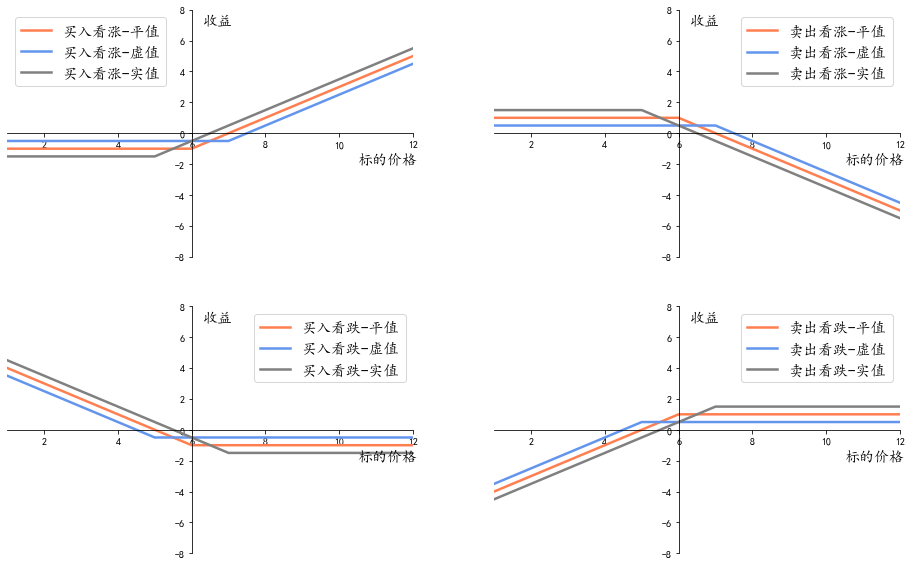

In [133]:
long_call_out = cal_profit(7, price_list, 0.5, 'C', 'long')
long_call_in = cal_profit(5, price_list, 1.5, 'C', 'long')
short_call_out = cal_profit(7, price_list, 0.5, 'C', 'short')
short_call_in = cal_profit(5, price_list, 1.5, 'C', 'short')
long_put_out = cal_profit(5, price_list, 0.5, 'P', 'long')
long_put_in = cal_profit(7, price_list, 1.5, 'P', 'long')
short_put_out = cal_profit(5, price_list, 0.5, 'P', 'short')
short_put_in = cal_profit(7, price_list, 1.5, 'P', 'short')

plt.figure(figsize=(16, 10))
i = 1
type_list = ['买入看涨', '卖出看涨', '买入看跌', '卖出看跌']
for _ in ['long_call', 'short_call', 'long_put', 'short_put']:
    plt.subplot(2, 2, i)
    plt.ylim(-8, 8)
    plt.xlim(1, 12)
    plt.plot(price_list, eval(_), 'coral', label=type_list[i-1] + '-平值', lw=2.5)  # eval将字符串变为变量名使用
    plt.plot(price_list, eval(_ + '_out'), 'cornflowerblue', label=type_list[i-1] + '-虚值', lw=2.5)
    plt.plot(price_list, eval(_ + '_in'), 'grey', label=type_list[i-1] + '-实值', lw=2.5)
    # 坐标轴设置
    ax = plt.gca()
    ax.spines['left'].set_position(('data',6))
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.legend(fontsize=15)
    plt.text(6.3, 7, '收益', fontsize=15)
    plt.text(10.5, -2, '标的价格', fontsize=15)
    i += 1

plt.show()

**内在价值**：期权为实值时，看涨期权的内在价值是(标的价格-行权价)，看跌期权的内在价值是(行权价-标的价格)，期权为平值或虚值时，内在价值为0.

**时间价值**：期权合约现价-内在价值

**杠杆**：期权权利金变化百分比/标的价格变化百分比=标的价格×Delta/权利金

## 模型与理论

### B-S模型

期权价值如上所述其实就是到期标的价格-行权价，即 c = S - K；但要求还没有到期的期权时，就需要推测到期时S的概率，即 N(d1)，同时进行贴现，那么有：


$$
\begin{align}
&c = S_0N(d_1)-Ke^{-rT}N(d_2)\\
&p = Ke^{-rT}N(-d_2)-S_0N(-d_1)\\
&d_1 = \frac{\ln(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt T}\\
&d_2 = \frac{\ln(S_0/K)+(r-\sigma^2/2)T}{\sigma\sqrt T} = d_1 - \sigma\sqrt T
\end{align}
$$

这些变量是:

- S0=基础资产在定价日的股票价格;
- K=行权价;
- T=期权合约的剩余期限（年），用 1 年的百分比表示；
- r=目前的无风险利率；
- $\sigma$=基础资产价格百分比变化（收益率）的年化波动率；
- ln=自然对数；
- N(x)= 标准正态分布的累积正态密度函数。

其中年波动率=每个交易日的$波动率*\sqrt{每年的交易日天数}$，每年的交易日天数为 365 天。下文采用的是滚动计算。


In [6]:
def value_BSM(S, K, sigma, r, T0, T1, types):
    try:
        S, K, types = float(S), float(K), types.tolist()[0]
    except:
        pass
    T = (T1 - T0).apply(lambda x: x.days) / 365  # 计算期权的剩余期限
    d1 = (np.log(S/K) + (r + pow(sigma, 2) / 2) * T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    if types == 'C':
        value_call = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)  # norm.cdf(d1) 是指 N(d1)
        return value_call
    if types == 'P':
        value_put = K * np.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        return value_put

#### 整理比特币期权数据

这里借鉴对股票数据的处理，先将所有的期权数据合并到一个 DataFrame，对时间和期权名称两列进行先后排序。

In [ ]:
import os

rule_type = '1H'  # 根据需求修改时间，如5T、30T、1H、1D等

# 导入某文件夹下所有期权的代码
def get_option_code_list_in_one_dir(path):
    """
    从指定文件夹下，导入所有csv文件的文件名
    :param path:
    :return:
    """
    option_list = []

    # 系统自带函数os.walk，用于遍历文件夹中的所有文件
    for root, dirs, files in os.walk(path):
        if files:  # 当files不为空的时候
            for f in files:
                if f.endswith('.csv'):
                    option_list.append(f[:-4])

    return sorted(option_list)

# ===读取所有期权代码的列表
path = r'C:\Users\xueli\data\coin\option\okex\1H\BTC-USD'
option_code_list = get_option_code_list_in_one_dir(path)

# ===读取比特币价格
df_btc = pd.read_pickle(r'C:\Users\xueli\python_file\coin_quant\coin_alpha\data\backtest\output\pickle_data\spot\BTC-USDT.pkl')
df_btc = df_btc[['candle_begin_time', 'close']]
df_btc.columns = ['candle_begin_time', 'btc_price']
df_btc = df_btc.resample(rule_type, on='candle_begin_time', label='left', closed='left').agg({'btc_price': 'last'})
df_btc['btc_return'] = np.log(df_btc['btc_price'] / df_btc['btc_price'].shift())
df_btc['btc_volatility'] = np.sqrt(365) * df_btc['btc_return'].rolling(365).std()  # **计算年化波动率**

# 循环读取期权数据
all_option_data = pd.DataFrame()  # 用于存储数据
for code in option_code_list:
    print(code)
    # =读入数据
    df = pd.read_csv(path + '/%s.csv' % code, encoding='gbk', skiprows=1, parse_dates=['candle_begin_time'])
    agg_dict = {
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
        'volume': 'sum',
        'currency_volume': 'sum',
    }
    df = df.resample(rule_type, on='candle_begin_time', label='left', closed='left').agg(agg_dict)
    df['symbol'], df['T1'], df['K'], df['types'] = code, pd.to_datetime('20' + code.split('-')[2]), code.split('-')[3], code.split('-')[-1]
    df = pd.merge(left=df, right=df_btc, on='candle_begin_time', how='left', sort=True, indicator=True)
    df.reset_index(inplace=True)
    # 合并数据
    all_option_data = all_option_data.append(df, ignore_index=False)


all_option_data.sort_values(['candle_begin_time', 'symbol'], inplace=True)
all_option_data.reset_index(inplace=True, drop=True)
all_option_data.to_pickle('option_btc_%s.pkl' % rule_type)
all_option_data

上述代码运行过后可以直接读取相应位置的数据文件，速度更快。

In [3]:
rule_type = '1D'  # 根据需求修改时间，如5T、30T、1H、1D等
df = pd.read_pickle(r'C:\Users\xueli\data\coin\option\okex\option_btc_%s.pkl' % rule_type)
df_btc = pd.read_pickle(r'C:\Users\xueli\python_file\coin_quant\coin_alpha\data\backtest\output\pickle_data\spot\BTC-USDT.pkl')
df_btc = df_btc[['candle_begin_time', 'close']]
df_btc.columns = ['candle_begin_time', 'btc_price']
df_btc = df_btc.resample(rule_type, on='candle_begin_time').agg({'btc_price': 'last'})
df_btc.reset_index(inplace=True)

#### 隐含波动率

**隐含波动率**：是市场参与者对未来波动率的预期值，当合约的隐含波动率显著高于其他合约时，则该合约被高估，反之则被低估。

无论是看涨期权还是看跌期权，随着期权执行价格的上升，隐含波动率不断下降（波动率微笑），但这并不是绝对的（波动率斜偏）。

> 计算隐波的方法：二分法和 Newton Raphson 方法

由于牛顿迭代法计算的步骤会比较多，所以其效率往往是比较低的，如果将结果的精确度进一步提高，则需要花费比较长的时间进行运算。

**二分法**的逻辑是计算波动率为50%位置时的期权价格，高于市场价格则切换到0-50%的区间，低于市场价格则切换到50-100%的区间（期权价格时波动率的增函数），多次迭代则可以计算出较高精确度的隐含波动率近似值。

但在计算中有时得不到结果，原因在于[期权实际价格大于或小于BS模型算出来的理论价格，这个时候用隐波已经无法衡量其实际价格的合理性了。期权客户端报价隐含波动率一栏有些显示“-”或者“0.0001”就是这个道理。](https://blog.csdn.net/hzk427/article/details/104501847/ '小粉桥反手王CSDN')

In [7]:
# 二分法计算隐波
def implied_volatility(P, S, K, r, T0, T1, types):
    try:
        P, S, K, types = float(P), float(S), float(K), types.tolist()[0]
        T = (T1 - T0).apply(lambda x: x.days) / 365  # 计算期权的剩余期限
    except:
        P, S, K = float(P), float(S), float(K)
        T = (T1-T0).days / 365
        pass
    
    
    sigma_min = 0.001
    sigma_max = 1.000
    sigma_mid = (sigma_min + sigma_max) / 2
    
    if types == 'C':
        
        def call_bs(S, K, sigma, r, T):
            d1 = (np.log(S/K) + (r + pow(sigma, 2) / 2) * T) / (sigma * np.sqrt(T))
            d2 = d1 - sigma * np.sqrt(T)
            return float(S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
        
        call_min = call_bs(S, K, sigma_min, r, T)
        call_max = call_bs(S, K, sigma_max, r, T)
        call_mid = call_bs(S, K, sigma_mid, r, T)
        diff = P - call_mid
        if (P < call_min) or (P > call_max):
            print('error, the price of option is beyond the limit')
            sigma_mid = np.nan
            return sigma_mid
        else:
            while abs(diff) > 0.001:
                diff = P - call_bs(S, K, sigma_mid, r, T)
                sigma_mid = (sigma_max + sigma_min) / 2
                call_mid = call_bs(S, K, sigma_mid, r, T)
                if P > call_mid:
                    sigma_min = sigma_mid
                else:
                    sigma_max = sigma_mid
    else:
        
        def put_bs(S, K, sigma, r, T):
            d1 = (np.log(S/K) + (r + pow(sigma, 2) / 2) * T) / (sigma * np.sqrt(T))
            d2 = d1 - sigma * np.sqrt(T)
            return float(K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
        
        put_min = put_bs(S, K, sigma_min, r, T)
        put_max = put_bs(S, K, sigma_max, r, T)
        put_mid = put_bs(S, K, sigma_mid, r, T)
        diff = P - put_mid
        
        if P < put_min or P > put_max:
            print('error, the price of option is beyond the limit')
            sigma_mid = np.nan
            return sigma_mid
        else:
            while abs(diff) > 1e-6:
                diff = P - put_bs(S, K, sigma_mid, r, T)
                sigma_mid = (sigma_min + sigma_max) / 2
                put_mid = put_bs(S, K, sigma_mid, r, T)
                if P > put_mid:
                    sigma_min = sigma_mid
                else:
                    sigma_max = sigma_mid
    return sigma_mid

### 波动率交易

#### 波动率微笑

**波动率微笑(volatility smile）**是一种描述期权隐含波动率与执行价格函数关系的图形，无论是看涨期权还是看跌期权，当执行价格偏离基础资产现货价格越远时，期权的波动率就越大，类似于微笑曲线（两头大）。

![](image/1-3-波动率.png)

然而，在大多数交易日，表现为波动率偏斜（volatility skew）。狭义波动率偏斜则是指当期权的执行价格由小变大时，期权的隐含波动率则是由大变小，即隐含波动率是执行价格的减函数。

对于执行价格较低的期权（通常是深度虚值看跌期权或深度实值看涨期权），这类期权的隐含波动率较高；相比下，对于执行价格较高的期权（通常是深度实值看跌期权或深度虚值看涨期权），此类期权的隐含波动率较低。即重要结论为：**隐含波动率是执行价格的减函数，无论是对于看涨期权还是看跌期权都是如此**。

#### 隐波的反身性

**期权隐波顶部通常是重要的操作信号**，即所有人都慌乱地以高价购买看跌期权时，往往市场价格就在底部，这是反向交易（即巴菲特的别人恐惧我贪婪）。

麦克米伦在《麦克米伦谈期权中》中认为隐含波动率可以用来预测趋势变动。股票价格下跌，看跌期权隐含波动率上升（股票价格上涨，看涨期权隐含波动率上升）。因此，如果能够在股票即将结束下行运动时抓住它，或许会发现这些期权是处于高价位的。而且，虽然股票也许不会马上就转入牛市的趋势，但它至少会在构造底部并稳定下来。

因此，麦克米伦认为在通常情况下，当看跌期权隐含波动率在股票下跌过程中达到最高点，那么股票至少是要稳定下来，也可能甚至反弹。同样的，当看涨期权隐含波动率在股票上涨过程中达到最高点，那么股票至少是要稳定下来，不会上涨过快，而是会保持平稳，也可能出现回调。

上面这种规律应用在指数期权中的效果常常比在股票期权中更好。

当市场暴跌，看跌期权隐含波动率猛升时，市场是在接近底部。当看跌期权隐含波动率最后达到顶部并且开始下降时，市场常常已经触及底部。反过来，如果看跌期权或看涨期权隐含波动率变得太低，我们就可以预见市场会有波动（并不一定是市场下跌，也不一定是市场上涨），这个波动可能发生在任一方向上，即期权价格处于布林下轨时难以对市场方向做出预测（隐波也低，但方向不确定），当期权价格处于布林上轨时可以进行预测（隐波高，本来的方向将结束）。

#### 波动率的择时

**波动率的变化对虚值期权的影响将大于相应的实值期权或平值期权**，这是谢尔登.纳坦恩伯格的《期权波动率与定价高级交易策略与技巧》中的结论，由此可知，实值期权对波动率的变化都是最不敏感的。这是因为随着期权变成深度实值期权，该期权对标的价格的变化越来越敏感，而对波动率的变化也越来越不敏感。因为投资者和交易者进入期权市场时，寻求的主要是波动率特征，所以期权市场中绝大部分交易量都集中在对波动力率变化最为敏感的平值期权和虚值期权上。所以我们要理解，期权最重要的投资原因是波动率，也就是择时，在底部时认为 A 股要涨，在顶部时认为 A 股要跌，这就是进行期权投资的主要用途，这就使得期权非常重视对于波动率的交易。


#### 隐波的特殊情况

正常来说，当标的价格大幅上涨或下降的时候隐波会上升，但有时候大盘涨了，隐波却下降，如2020-10-09，如2021-07-12，而且有时候大盘波动幅度不大，但隐波快速上升，如2020-04-28；隐波上升的充分条件为出现止损盘，即高度看多的场合下，空仓的想做多，原本看空的想平仓，那么随着平仓了结的持续，**[持仓量](塔勒布期权交易日记20210712：持仓量——没有止损盘的场景 'https://bbs.quantclass.cn/thread/5188')**会降低。

### GREEKS希腊字母

- **Delta**：期权价格关于标的价格的变化率，即标的股价变动1元，期权价格变动多少。
- **Gamma**：期权的 Delta 关于标的价格的变化率，即标的价格变动1元，期权的Delta变动多少。
- **Theta**：期权价格关于到期时间的变化率，即时间过了一天，期权的价格变化多少。
- **Vega**：期权价格关于波动率的变化率，即波动率变化了1%，期权的价格变动多少。
- **Rho**：期权价格关于无风险利率的变化率，即无风险利率变化了1%，期权价格变化多少。



In [13]:
def greeks_option(S, K, sigma, r, T, optype=None, positype=None):
    d1 = (np.log(S/K) + (r + pow(sigma, 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    gamma = np.exp( -pow(d1, 2) / 2) / (S * sigma * np.sqrt(2 * np.pi * T))
    theta_call = -(S * sigma * np.exp(-pow(d1, 2) / 2)) / (2 * np.sqrt(2 * np.pi * T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
    delta, theta = np.nan, np.nan  # 有时候只求gamma时，将这两个赋为nan值
    if optype == 'C':
        theta = theta_call
        if positype == 'long':
            delta = norm.cdf(d1)
        if positype == 'short':
            delta = -norm.cdf(d1)
    if optype == 'P':
        theta = theta_call + r * K * np.exp(-r * T)
        if positype == 'long':
            delta = norm.cdf(d1) - 1
        if positype == 'short': 
            delta = 1 - norm.cdf(d1)
    
    greeks = {'delta': delta, 'gamma': gamma, 'theta': theta}
    return greeks

#### Delta

对于期权价格来说，标的物价格的变化和波动率是远远大于期权时间流逝的影响。这里有两个原因，第一个是因为标的物的价格变化是唯一可以直接改变期权内在价值的，内在价值的改变是直接影响到期权到期时候价格的变化。第二个原因是如果一旦波动率变大，本来较远的行权价的期权变得更有可能被变成实值期权，这样就会导致现在的期权价格变得更贵些。

期权的 Delta（$\Delta$）∶定义为期权价格变动与其标的资产价格变动的比率。它是描述期权价格与标的资产价格之间关系曲线的切线斜率。假定某看涨期权 delta 为 0.6，这意味着当股票价格变化一个很小的数量时，相应的期权价值变化大约等于股票价值变化的 60%。

**动态对冲（dynamical hedging）**：如果股票价格上涨 1 美元，期权价格将会上涨大约 0.6x1=0.6 美元，1 股股票本身的 delta 为 1.0。如果在 3天后的股票价格也许会升到 110 美元。那么，股票价格上涨时会使 delta 变大，假设 delta 从0.6 增加到 0.65，如果仍要保持 delta 中性，投资者需要再买入 0.05×2000=100 股股票。这种对冲头寸需要不断调整的就是动态对冲。

总体而言，Delta 是期权价值对于标的资产价格变化的敏感度。看涨期权 call 的 Delta 的理论值即为 N (d1)，其中：

$$
d_1 = \frac{\ln(\frac{S_0}K+(r+\sigma^2/2)T}{\sigma\sqrt T}
$$

看跌期权的 Delta 的理论值为 N (d1)-1，所以看跌期权的 Delta 是不大于 0 的负值。总体而言，看涨期权的 delta 值为 0 到 1，看跌期权的 delta 值为-1 到 0。


| 期权类型   | 方向 | Delta的表达式 |
|--------|----|-----------|
| 欧式看涨期权 | 多头 | Δ=N(d1)   |
|        | 空头 | Δ=-N(d1)  |
| 欧式看跌期权 | 多头 | Δ=N(d1)-1 |
|        | 空头 | Δ=1-N(d1) |

Delta 值对于度量一个由标的资产与多种期权持仓所组成的投资组合的风险程度是非常有价值的。另外一个作用，就是作为在为持有资产做对冲时的对冲比例。另外一个相对被使用较少的现实意义，就是大致等于期权在到期时为实值期权(in the money)概率，但在真实的交易世界里，通常很少有交易员将 Delta 作为一个很值得信赖的概率。


特征：

1. 平值期权的 Delta 值在通常情况下大概是 0.5。
2. 看涨期权里的实值期权的 Delta 值在通常情况下大于 0.5 且小于 1，深度实值期权的 Delta 值接近于 1。
3. 看涨期权里的虚值期权的 Delta 值在通常情况下小于0.5。执行价格越是高于股票价格，则对应的虚值期权的 delta 值也就越小。即将要到期的实值期权的 Delta 值都接近 1.00，虚值期权的 Delta 值则接近 0，这里是因为实值期权接近到期日时，时间价值为 0，期权价值变化完全由内涵价值变化决定，此时 Delta 值为 1；虚值期权接近到期日时，内涵价值和时间价值都为 0，此时 Delta 值为 0。

美国股票市场由于机构投资者要保持 delta 中性，因此会出现股票价格上涨为保持 delta 中性继续购买股票；股票价格下跌为保持 delta 中性继续卖出股票，这种股票价格运动方向趋势性增强的现象，整体上美股呈现出越涨越涨，越跌越跌的趋势。因此美股的趋势性是比 A 股要更强的。

##### delta与资产价格的关系

1. 当基础资产价格增大的时候，期权的 Delta 值会增加；
2. 曲线的斜率始终是正的，用后面讨论的期权Gamma 值来描述就是期权的 Gamma 值始终为正；
3. 当基础资产价格小于期权执行价格（6 元／股）时，随着基础资产价格的增大，曲线的斜率递增；相反，当基础资产价格大于执行价格时，曲线的斜率递减。

##### delta与期权期限的关系

1. 实值看涨期权多头，随着期权期限的增加，实值看涨期权的 Delta 值是先递减然后再缓慢递增；
2. 平价、虚值期权的 Delta值均是期权期限的递增函数，但是虚值期权 Delta 值的边际增量则大于平价期权。

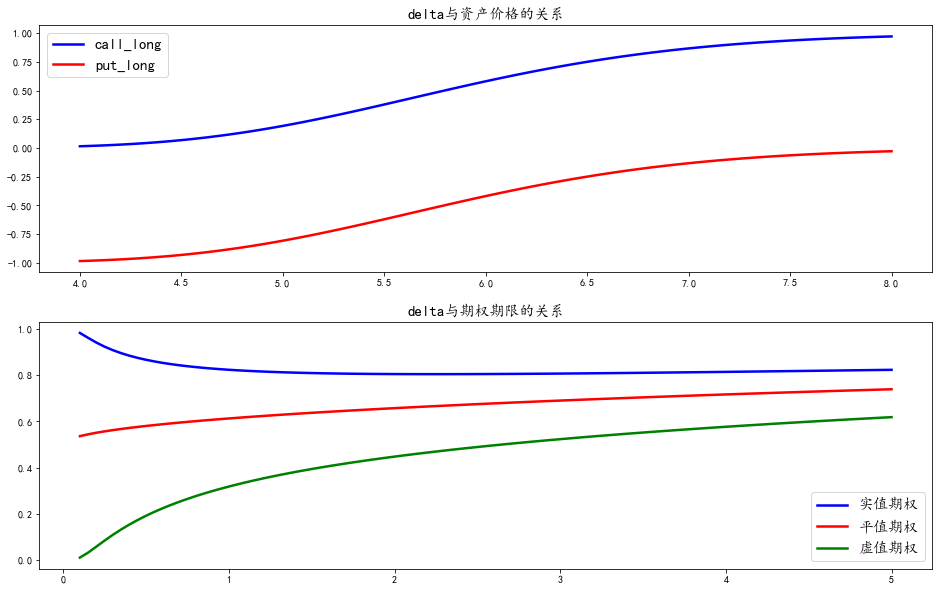

In [18]:
S_list = np.linspace(4.0, 8.0, 100)
delta_call = greeks_option(S_list, 6, 0.24, 0.04, 0.5, 'C', 'long')['delta']
delta_put = greeks_option(S_list, 6, 0.24, 0.04, 0.5, 'P', 'long')['delta']
T_list = np.linspace(0.1, 5.0, 100)
delta_call_1 = greeks_option(7, 6, 0.24, 0.04, T_list, 'C', 'long')['delta']
delta_call_2 = greeks_option(6, 6, 0.24, 0.04, T_list, 'C', 'long')['delta']
delta_call_3 = greeks_option(5, 6, 0.24, 0.04, T_list, 'C', 'long')['delta']

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(S_list, delta_call, 'b-', label=u'call_long', lw=2.5)
plt.plot(S_list, delta_put, 'r-', label=u'put_long', lw=2.5)
plt.legend(fontsize=15)
plt.title('delta与资产价格的关系', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(T_list, delta_call_1, 'b-', label=u'实值期权', lw=2.5)
plt.plot(T_list, delta_call_2, 'r-', label=u'平值期权', lw=2.5)
plt.plot(T_list, delta_call_3, 'g-', label=u'虚值期权', lw=2.5)
plt.title('delta与期权期限的关系', fontsize=15)
plt.legend(fontsize=15)
plt.show()

####  Gamma

Gamma 是 Delta 的变化量。如某一期权的 Delta 为 0.4，Gamma 值为 0.05，则表示期货价格上升 1 元，所引起 Delta 增加量为 0.05，Delta 将从 0.4 增加到 0.45。在其他 Greeks变量不变的前提下，当股票价格发生微小变化时，期权 Delta 的变化值就是 Gamma。本质上说，它衡量了 delta 变化速度的快慢。

与 Delta 不同，无论看涨期权或是看跌期权的 Gamma 值均为正值。标的物价格上涨，看涨期权的 Delta 值由 0 向 1 移动，看跌期权的 Delta 值从-1 向 0 移动，即期权的 Delta 值从小到大移动，Gamma 值为正。股票价格下跌，看涨期权的 Delta 值由 1 向 0 移动，看跌期权的 Delta 值从 0 向-1 移动，即期权的 Delta 值从大到小移动，Gamma 值始终为正。

期权的 Gamma（$\Gamma$）是指期权 Delta 值的变化与基础资产价格变化的比率。Gamma 是期权价值关于基础资产价格的二阶偏导数。

其中，$\Gamma$依然表示期权的价值，S 依然表示期权基础资产价格。比如，期权 Gamma 等于 0.3，这就意味着当基础资产价格变化时，相应期权 Delta 值的变化约等于基础资产价格变化的 30％。根据布莱克斯科尔斯默顿模型，对于欧式看涨和欧式看跌期权的 Gamma 值的表达式均是：

$$
\begin{align}
&\Gamma=\frac{N'(d_1)}{S_0\sigma\sqrt T}\\
&其中，\\
&d_1=\frac{\ln(\frac{S_0}{K}+(r+\sigma^2/2)T}{\sigma\sqrt T}\\
& N'(x)=\frac1{\sqrt{2\pi}}e^{-x^2/2}\\
&为了便于建模，整理为：\\
&\Gamma=\frac{N'(d_1)}{S_0\sigma\sqrt T}=\frac1{S_0\sigma\sqrt{2\pi T}}e^{-d_1^2/2}\\
\end{align}
$$


##### 策略

在中性策略下面一个比较成熟的策略 **Gamma Scalping**。这个策略的核心做法就是通过买入期权（做多 Gamma），然后来回赚标的物波动带来的价值。简单来说这个策略就是你付出一定的费用，去预测未来标的物会有大幅波动。如果在期权到期内波动不够大或者波动率朝着我们不利的方向，就会导致策略的亏损，也是所在的风险。所以这个策略一般喜欢在期权处于低波动率时使用。首先低波动率下，期权便宜，做多 Gamma 的成本相对就低一点，另外如果未来波动率会上升，我们做多 Vega 也同时可以赚到一些利润。低 IV 的状态下，Delta 和 Gamma 会更敏感一些，这样波动起来的时候，会给我们更多的利润。而高 IV 的状态下，Delta 和 Gamma 会显得不敏感，在同样的利润下，需要更大的波动才可以。总而言之，如果期权在短期内没有波动或者波动不足够大的话，整个策略是会有亏损的。

##### gamma与资产价格的关系

Gamma曲线比较接近于正态分布曲线，并且曲线可以分为两段，第 1 段是基础资产价格显著小于期权执行价格，也就是看涨期权是深度虚值、看跌期权是深度实值，期权 Gamma 是基础资产价格的递增函数；第 2 段是基础资产价格略小于和大于期权执行价格，期权 Gamma 是基础资产价格的递减函数。此外，当期权接近于平价期权时，也就是基础资产价格接近于期权执行价格时，期权 Gamma 值最大。

##### gamma与期权期限的关系

对于平价期权而言，Gamma 是期权期限的递减函数；同时，期限短的平价期权 Gamma 很高，这意味着越接近合约到期日，平价期权的 Delta 值对于基础资产价格变动越敏感。此外，无论对于虚值期权还是实值期权，当期权期限比较短时，Gamma 是期限的递增函数；当期限拉长时 Gamma 则变成了期限的递减函数.

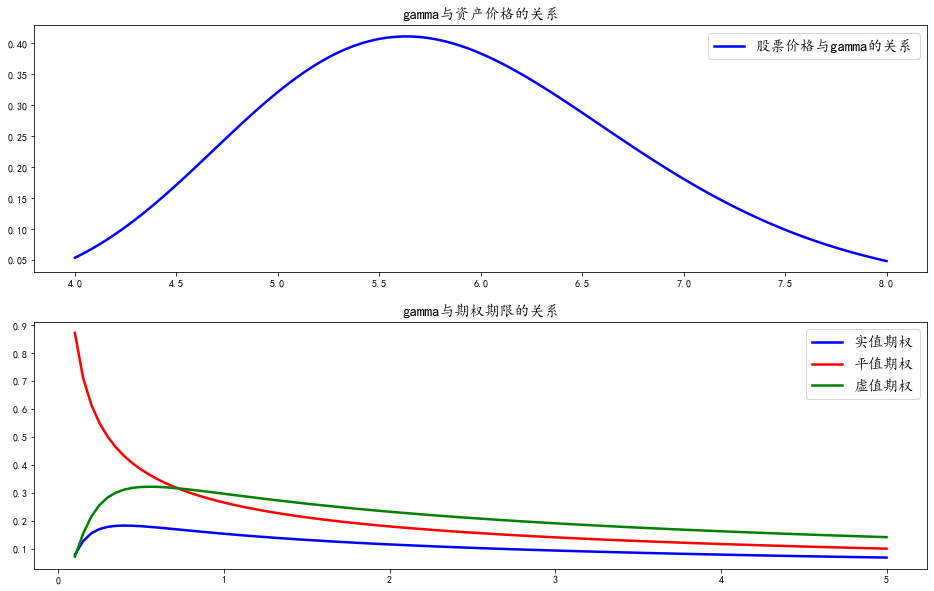

In [19]:
S_list = np.linspace(4.0, 8.0, 100)
gamma_list = greeks_option(S_list, 6, 0.24, 0.04, 0.5)['gamma']
T_list = np.linspace(0.1, 5.0, 100)
gamma1 = greeks_option(7, 6, 0.24, 0.04, T_list)['gamma']
gamma2 = greeks_option(6, 6, 0.24, 0.04, T_list)['gamma']
gamma3 = greeks_option(5, 6, 0.24, 0.04, T_list)['gamma']

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(S_list, gamma_list, 'b-', label=u'股票价格与gamma的关系', lw=2.5)
plt.legend(fontsize=15)
plt.title('gamma与资产价格的关系', fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(T_list, gamma1, 'b-', label=u'实值期权', lw=2.5)
plt.plot(T_list, gamma2, 'r-', label=u'平值期权', lw=2.5)
plt.plot(T_list, gamma3, 'g-', label=u'虚值期权', lw=2.5)
plt.title('gamma与期权期限的关系', fontsize=15)
plt.legend(fontsize=15)
plt.show()

#### Theta

期权组合的 theta（Θ）定义为在其他条件不变时，投资组合价值变化与时间变化的比率。Theta 就是度量期权价值随时间流失衰减的速率。一些投资者之前可能有疑问为什么做期权交易的时候明明选择的方向对了，最后却没有赚钱，问题往往就是出在 Theta 这里。

theta 有时称为组合的时间损耗（time decay）。对于一个无股息股票上的欧式看涨期权，计算 theta 的公式可以从布莱克斯科尔斯模型得出：

$$
\Theta=-\frac{S_0N'(d_1)\sigma}{2\sqrt T}-rKe^{-rT}N(d_2)\\
其中N'(x)=\frac1{\sqrt{2\pi}}e^{-x^2/2}为标准正态分布的密度函数。
$$

对于股票上的欧式看跌期权，计算 theta 的公式为：

$$
\Theta=-\frac{S_0N'(d_1)\sigma}{2\sqrt T}+rKe^{-rT}N(-d_2)=\Theta_{call}+rKe^{-rT}\\
$$

因为N(−d2) = 1 − N(d2)，看跌期权的 theta 比相应看涨期权的 theta 高出$rKe^{−rT}$。

Theta（Θ）本身是这样的：

$$
\Theta=\frac{\partial\Pi}{\partial T}\\
其中，\Gamma依然表示期权的价格，T 表示期权的期限。
$$

期权的 theta 一般是负的，这是因为在其他条件不变的情况下，随着期限的减小，期权价值会降低。当股票价格很低时，theta 接近于零。对应于一个平值看涨期权，theta 很大而且是负值。当股票价格很高时，theta 接近于$rKe^{−rT}$。因此我们可以得到一个结论：当购买一个看涨期权时，不应购买平值期权，而应**尽量购买虚值期权**。

在处于平值期权时，期权价值受到时间价值的变化较明显，这是因为，对于虚值期权，影响期权价值最大的是股票价格的变化，而不是时间变化。

##### theta与资产价格的关系

1. 无论是看涨期权还是看期权，Theta 与基础资产价格之间关系的曲线形状是很相似的；
2. 在期权行权价格（6 元／股）附近，也就是接近于平价期权的时候，无论是看涨期权还是看跌期权，Theta 是负值并且绝对值很大，这就意味着期权的价值对时间的变化非常敏感；
3. 当基础资产价格大于执行价格时，Theta 的绝对值处于下降阶段；
4. 当基础资产价格小于执行价格时，对于看跌期权而言，随着基础资产价格不断减小，期权 Theta 将由负转正并趋近于某一正数，而看涨期权的 Theta 则趋近于零。

##### theta与期权期限的关系

1. 当期权期限越短（即越临近期到期日），平价期权的 Theta 绝对值越大，并且与实值期权、虚值期权在 Theta 上的差异也是最大的。对此，可以利用直觉来理解这一点，因为当期权是平价时，期权到期时行权的不确定性最大，所以平价期权的价值对时间的敏感性就很大；
2. 平价期权的 Theta 值是期权期限的递增函数，相反，虚值期权和实值期权的 Theta 值在期权期限较短时是期限的递减函数，在期限较长时则是期限的递增函数；
3. 当期权期限不断变长时，实值期权、平价期权、虚值期权的 Theta 将会趋近。

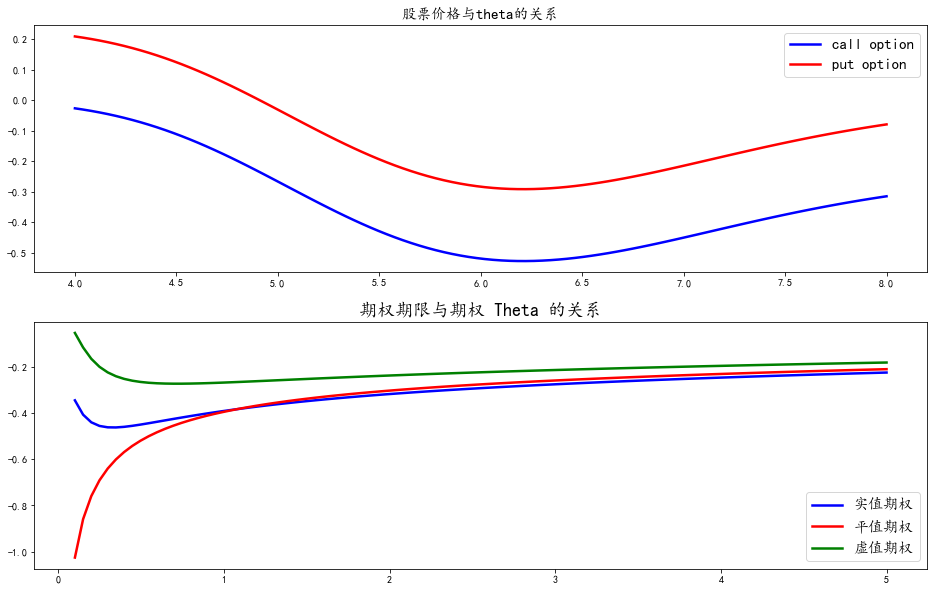

In [20]:
S_list = np.linspace(4.0, 8.0, 100)
theta_list1 = greeks_option(S_list, 6, 0.24, 0.04, 0.5, 'C')['theta']
theta_list2 = greeks_option(S_list, 6, 0.24, 0.04, 0.5, 'P')['theta']
T_list = np.linspace(0.1, 5.0, 100)
theta1 = greeks_option(7, 6, 0.24, 0.04, T_list, 'C')['theta']
theta2 = greeks_option(6, 6, 0.24, 0.04, T_list, 'C')['theta']
theta3 = greeks_option(5, 6, 0.24, 0.04, T_list, 'C')['theta']

plt.figure(figsize=(16, 10))
plt.subplot(2, 1, 1)
plt.plot(S_list, theta_list1, 'b-', label=u'call option', lw=2.5)
plt.plot(S_list, theta_list2, 'r-', label=u'put option', lw=2.5)
plt.title(u'股票价格与theta的关系', fontsize=15)
plt.legend(fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(T_list, theta1, 'b-', label=u'实值期权', lw=2.5)
plt.plot(T_list, theta2, 'r-', label=u'平值期权', lw=2.5)
plt.plot(T_list, theta3, 'g-', label=u'虚值期权', lw=2.5)
plt.title(u'期权期限与期权 Theta 的关系', fontsize=18)
plt.legend(fontsize=15)
plt.show()

#### 讨论 delta、theta 和 gamma 之间的关系

由股票价格服从对数正态分布的性质出发，我们可以得出 0 与 T 之间连续复利收益率的概率分布。将 0 与 T之间以连续复利的收益率记为 x，那么$S_T=S_0e^{xT}, x=\frac1T\ln\frac{S_T}{S_0}$.

无股息股票上单个衍生品的价格必须满足微分方程式$x=\frac1T\ln\frac{S_T}{S_0}$。 因此，由这些衍生产品所组成的资产组合π也一定满足布莱克斯科尔斯模型构成的微分方程。

$$
\begin{align}
&\frac{\partial\Pi}{\partial t}+rS\frac{\partial\Pi}{\partial S}+\frac12\sigma^2S^2\frac{\partial^2\Pi}{\partial S^2}=r\Pi\\
&\Theta+rS\Delta+\frac12\sigma^2S^2\Gamma=r\Pi\\
&如果投资组合是 Delta 中性的，则 Delta =0，可得\\
&\Theta+\frac12\sigma^2S^2\Gamma=r\Pi\\
&其中\Theta=\frac{\partial\pi}{\partial t},\Delta=\frac{\partial\pi}{\partial S},\Gamma=\frac{\partial^2\pi}{\partial S^2}\\
\end{align}
$$

这一公式说明当$\Theta$很大并且为正时，交易组合的 gamma 也很大，但为负，这一结论反过来也成立。这在理论上解释了对于 delta 中性的交易组合，我们可以将 theta 作为 gamma 的近似。


# 策略

|                 情况                 |     策略     |
| :----------------------------------: | :----------: |
|           预期上涨但怕暴跌           |   保险策略   |
| 降低保险策略权利金且预计上涨幅度不大 |   领口策略   |
|               温和上涨               |   备兑开仓   |
|           看好后市降低成本           |   合成策略   |
|          后市不定向大幅波动          |   买入跨式   |
|          后市不定向小幅震荡          |   卖出跨式   |
|              低价屯标的              | 抄底锁定价格 |

期权策略的目的其实只有三个：看涨、看跌、不看方向看波动；所有的策略都只是补单腿的风险敞口。

In [163]:
# 为策略计算
def option_strategy(strike, price, fee, name):
    long_call = cal_profit(strike, price, fee, 'C', 'long')
    short_call = cal_profit(strike, price, fee, 'C', 'short')
    long_put = cal_profit(strike, price, fee, 'P', 'long')
    short_put = cal_profit(strike, price, fee, 'P', 'short')
    holding = price - strike 
    long_call_out = cal_profit(strike+1, price, fee-0.5, 'C', 'long')
    long_call_in = cal_profit(strike-1, price, fee+0.5, 'C', 'long')
    short_call_out = cal_profit(strike+1, price, fee-0.5, 'C', 'short')
    short_call_in = cal_profit(strike-1, price, fee+0.5, 'C', 'short')
    long_put_out = cal_profit(strike-1, price, fee-0.5, 'P', 'long')
    long_put_in = cal_profit(strike+1, price, fee+0.5, 'P', 'long')
    short_put_out = cal_profit(strike-1, price, fee-0.5, 'P', 'short')
    short_put_in = cal_profit(strike+1, price, fee+0.5, 'P', 'short')
    
    if name=='保险策略':
        profit = holding + long_put
    if name=='领口策略':
        profit = holding + long_put + short_call_out
    if name=='备兑开仓':
        profit = holding + short_call
    if name=='合成策略':
        profit = long_call + short_put
    if name=='买入跨式':
        profit = long_call + long_put
    if name=='卖出跨式':
        profit = short_call + short_put
    if name=='牛市价差':
        profit = long_call_in + short_call_out
    if name=='熊市价差':
        profit = long_call_out + short_call_in
    if name=='买入蝶式看涨':
        profit = long_call_in + long_call_out + (2 * short_call)
    if name=='买入蝶式看跌':
        profit = long_put_in + long_put_out + (2 * short_put)
    if name=='卖出蝶式看涨':
        profit = short_call_in + short_call_out + (2 * long_call)
    if name=='卖出蝶式看跌':
        profit = short_put_in + short_put_out + (2 * long_put)
    if name=='铁蝶式策略':
        profit = long_put_in + long_call_out + short_call + short_put
    
    strategy_dict = {
        'name': name, 'profit': profit, 'holding': holding, 'long_call': long_call, 'short_call': short_call, 'long_put': long_put, 
        'short_put': short_put, 'long_call_out': long_call_out, 'long_call_in': long_call_in, 'short_call_out': short_call_out, 
        'short_call_in': short_call_in, 'long_put_out': long_put_out, 'long_put_in': long_put_in, 'short_put_out': short_put_out, 
        'short_put_in': short_put_in,
    }
    return strategy_dict


# 画图，采用的是条件语句，本来想用可变参数，但这样的话会重复计算很多东西，不如先把所有可能的情况求出来，然后直接输入
def draw_pic_strategy(x, strategy_dict):
    # 变量设置
    y = strategy_dict['profit']
    name = strategy_dict['name']
    
    # 画图
    plt.figure(figsize=(16, 10))
    plt.ylim(-8, 8)
    plt.xlim(1, 12)
    plt.plot(x, y, 'coral', label=name, lw=2.5)
    # 分支
    if name=='保险策略':
        plt.plot(x, strategy_dict['holding'], 'cornflowerblue', label='持有标的', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['long_put'], 'lightcoral', label='买入看跌', lw=1.5, linestyle='--')
    if name=='领口策略':
        plt.plot(x, strategy_dict['holding'], 'cornflowerblue', label='持有标的', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['long_put'], 'lightcoral', label='买入看跌', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_call_out'], 'plum', label='卖出虚值看涨', lw=1.5, linestyle='--')
    if name=='备兑开仓':
        plt.plot(x, strategy_dict['holding'], 'cornflowerblue', label='持有标的', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_call'], 'lightcoral', label='卖出看涨', lw=1.5, linestyle='--')
    if name=='合成策略':
        plt.plot(x, strategy_dict['long_call'], 'cornflowerblue', label='买入看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_put'], 'lightcoral', label='卖出看跌', lw=1.5, linestyle='--')
    if name=='买入跨式':
        plt.plot(x, strategy_dict['long_call'], 'cornflowerblue', label='买入看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['long_put'], 'lightcoral', label='买入看跌', lw=1.5, linestyle='--')
    if name=='卖出跨式':
        plt.plot(x, strategy_dict['short_call'], 'cornflowerblue', label='卖出看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_put'], 'lightcoral', label='卖出看跌', lw=1.5, linestyle='--')
    if name=='牛市价差':
        plt.plot(x, strategy_dict['long_call_in'], 'cornflowerblue', label='买入实值看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_call_out'], 'lightcoral', label='卖出虚值看涨', lw=1.5, linestyle='--')
    if name=='熊市价差':
        plt.plot(x, strategy_dict['long_call_out'], 'cornflowerblue', label='买入虚值看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_call_in'], 'lightcoral', label='卖出实值看涨', lw=1.5, linestyle='--')
    if name=='买入蝶式看涨':
        profit = long_call_in + long_call_out + (2 * short_call)
        plt.plot(x, strategy_dict['long_call_in'], 'cornflowerblue', label='买入实值看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['long_call_out'], 'lightcoral', label='买入虚值看涨', lw=1.5, linestyle='--')
        plt.plot(x, 2 * strategy_dict['short_call'], 'plum', label='卖出两份看涨', lw=1.5, linestyle='--')
    if name=='买入蝶式看跌':
        profit = long_put_in + long_put_out + (2 * short_put)
        plt.plot(x, strategy_dict['long_put_in'], 'cornflowerblue', label='买入实值看跌', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['long_put_out'], 'lightcoral', label='买入虚值看跌', lw=1.5, linestyle='--')
        plt.plot(x, 2 * strategy_dict['short_put'], 'plum', label='卖出看跌', lw=1.5, linestyle='--')
    if name=='卖出蝶式看涨':
        profit = short_call_in + short_call_out + (2 * long_call)
        plt.plot(x, strategy_dict['short_call_in'], 'cornflowerblue', label='卖出实值看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_call_out'], 'lightcoral', label='卖出虚值看涨', lw=1.5, linestyle='--')
        plt.plot(x, 2 * strategy_dict['long_call'], 'plum', label='买入看涨', lw=1.5, linestyle='--')
    if name=='卖出蝶式看跌':
        profit = short_put_in + short_put_out + (2 * long_put)
        plt.plot(x, strategy_dict['short_put_in'], 'cornflowerblue', label='卖出实值看跌', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_put_out'], 'lightcoral', label='卖出虚值看跌', lw=1.5, linestyle='--')
        plt.plot(x, 2 * strategy_dict['long_put'], 'plum', label='买入看跌', lw=1.5, linestyle='--')
    if name=='铁蝶式策略':
        profit = long_put_in + long_call_out + short_call + short_put
        plt.plot(x, strategy_dict['long_put_in'], 'cornflowerblue', label='买入实值看跌', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['long_call_out'], 'lightcoral', label='买入虚值看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_call'], 'plum', label='卖出看涨', lw=1.5, linestyle='--')
        plt.plot(x, strategy_dict['short_put'], 'lightgreen', label='卖出看跌', lw=1.5, linestyle='--')
    
    # 坐标轴设置
    ax = plt.gca()
    ax.spines['left'].set_position(('data',6))
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.legend(fontsize=15)
    plt.text(6.3, 7, '策略收益', fontsize=15)
    plt.text(10.5, -2, '标的价格', fontsize=15)
    
    return plt

## 保守型交易策略

### 保险策略

期权可以作为一种保险工具，来帮助投资者规避市场出现不利变化时带来的损失，可以有效地防范市场下行风险。

#### 方法

1. 持有标的或者买入标的的同时，买入相应数量的看跌期权
2. 卖出标的的同时，买入相应数量的看涨期权

#### 适用场景

1. 预期会上涨，但又担心市场会下行
2. 预期市场下行，但标的无法抛售(如质押等情况)
3. 目前持有的标的已获得较好收益，想锁定收益的同时仍保留上行收益的空间

#### 注意事项

1. 长期看好的标的进行保险，否则应该卖出
2. 选择合适的行权价
3. 到期时间要匹配

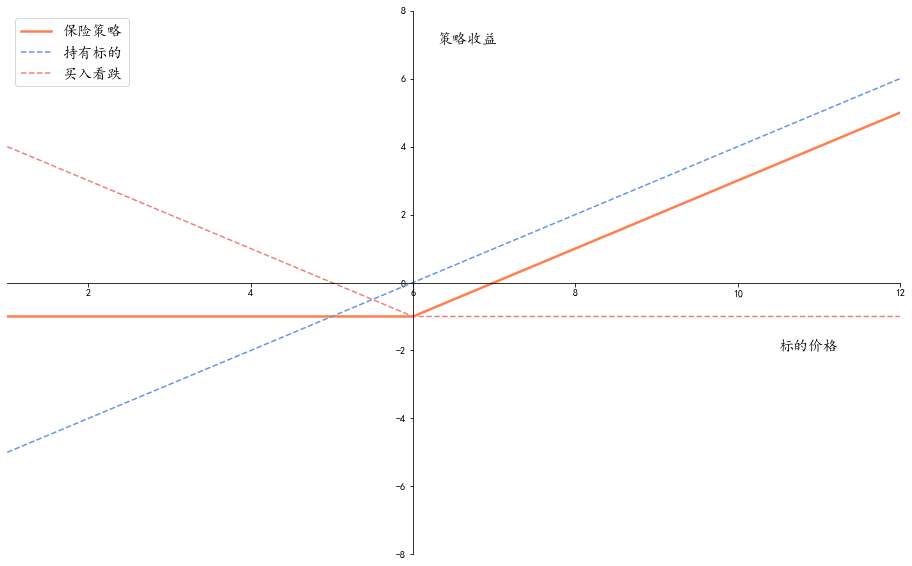

In [137]:
plt = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '保险策略'))

### 领口策略

保险策略需要保险成本，买入看跌期权有时需要支付较高的权利金，此时可以采取领口策略降低保险成本。

就是在持有保险策略的同时，卖出看涨期权，以看涨期权所得的权利金收入降低整个保险策略的成本。

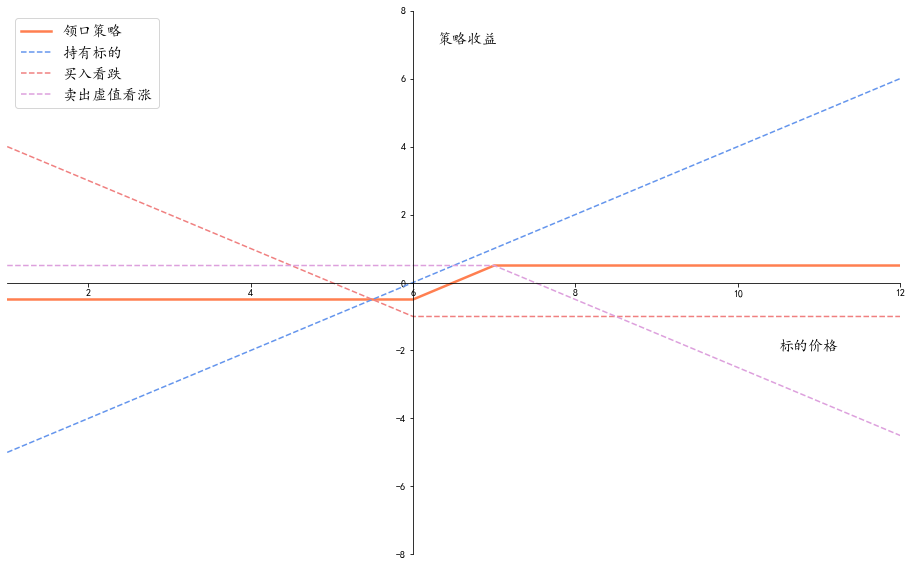

In [139]:
plt = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '领口策略'))

### 备兑开仓策略

#### 方法

持有标的的同时，卖出相应数量的看涨期权，获得权利金收入。(由于用全额标的作为担保，所以不用额外缴纳现金作为保证金)

#### 适用场景

当预期未来标的处于不涨或温和涨幅时，可以通过此方法来增强收益、降低成本。

#### 注意事项

1. 合约选择。最好选择平值或轻度虚值的合约，深度虚值权利金较小。
2. 心理准备。一方面建议把行权价选在心理卖出价格附近，这样即时行权也能按照心理目标价位卖出；另一方面无法防范标的持续下跌的风险，同样大幅上涨会带来较大损失。
3. 及时调整。如果市场不在预期，应及时了结头寸或转换策略。

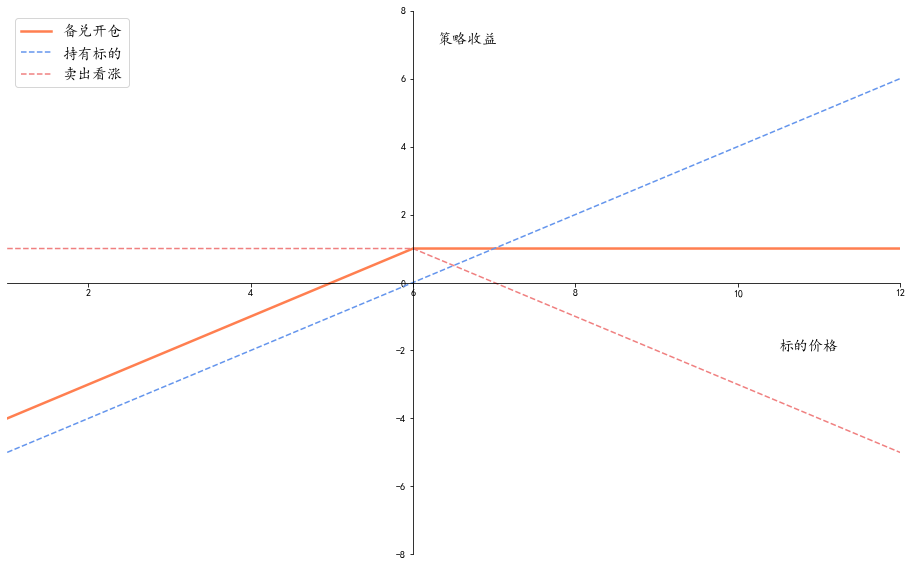

In [140]:
plt = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '备兑开仓'))

### 合成策略


合成策略是一种利用期权复制标的收益的交易策略，通过这个策略的使用，可以获得与标的相同的收益，但所需花费的成本较低，提高了投资者的资金使用效率。

#### 方法

买入一份看涨期权，同时卖出一份具有相同执行价格、相同到期日的看跌期权。

#### 适用场景

强烈看好标的的未来走势时，可通过这种交易策略来降低成本做多后市。

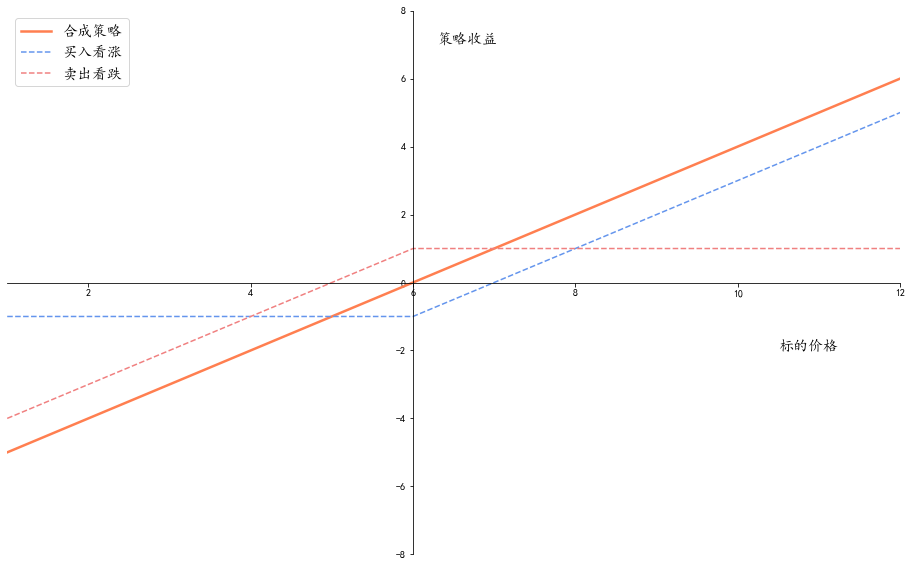

In [141]:
plt = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '合成策略'))

### 抄底锁定价格

#### 方法

在目标价位挂单购买标的，同时卖出一份行权价为目标价位的看跌期权。

如果价格跌到目标价位正好买入标的，同时赚权利金(账户内需要有相应标的)；如果价格没有跌到目标，则不会被行权，赚权利金。

## 震荡交易市场策略

### 跨式策略

#### 方法

1. **买入跨式**：买入相同数量、相同行权价格的看涨期权和看跌期权
2. **卖出跨式**：卖出相同数量、相同行权价格的看涨期权和看跌期权

#### 适用场景

1. 预料之后会有大幅度波动的后市，买入跨式策略
2. 预料之后只会有小幅度的调整、震荡行情，卖出跨式策略

#### 注意事项

尽量买入跨式的最大亏损是有限的，潜在的盈利是无限的，但付出了双重权利金，成本一般比较高。

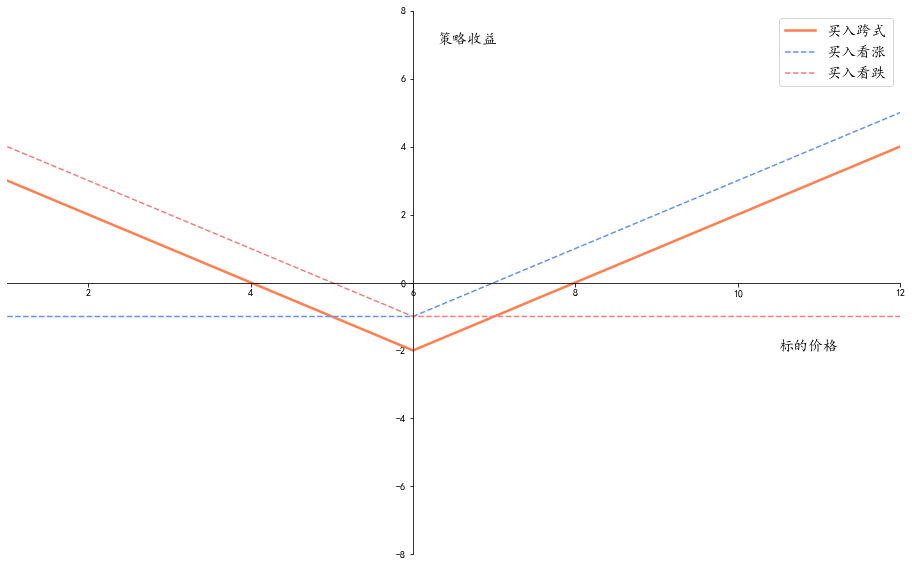

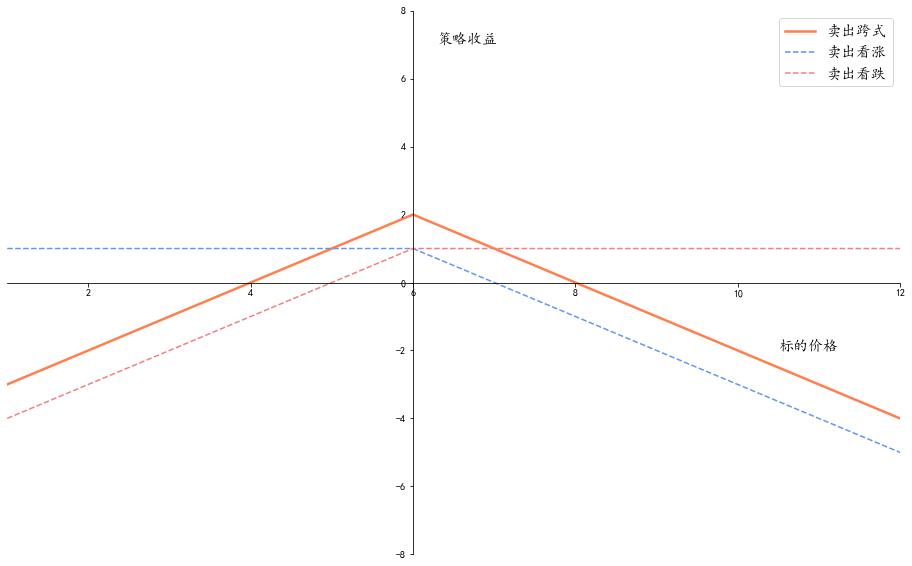

In [152]:
plt1 = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '买入跨式'))
plt2 = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '卖出跨式'))

## 价差交易

是指在买入期权的同时卖出具有相同标的、其他要素有所差异的期权合约，所有价差交易均由同一种期权类型构成，通过调整支出或收入的权利金来控制组合策略盈亏。

根据期权类型的不同，可分为看涨价差策略和看跌价差策略；根据期权行权价和到期日不同，可分为垂直价差、水平价差和对角价差三大类；根据策略构建时收入或支出权利金的不同，可分为收入型价差和支出型价差。

### 牛市价差 bull spread

盈利有限、亏损有限。

在看涨的前提下卖出一份更高行权价的call，不用担心爆仓。

#### 方法

买低卖高：买入较低行权价的看涨期权，卖出较高行权价、相同到期日的看涨期权。

由于行权价越高，权利金越低，所以牛市看涨价差买入的期权比卖出的期权贵，会发生现金流净流出，是一个支出型价差。

#### 收益

![11牛市价差](image\11牛市价差.1.png)



K1为买入看涨期权的执行价格，K2为卖出期权的执行价格，K1 < K2, St为到期日标的的价格。

可以如此描述：投资者拥有一个执行价格为K1的看涨期权，通过卖出执行价格为K2的期权而放弃了股票上升时的潜在盈利，作为补偿获得了执行价格为K2的期权费用。

#### 适用场景

对未来行情适度看涨或希望以较低的成本来获取标的上涨收益

### 熊市价差

熊市价差策略指在标的价格下跌过程中，投资者可以通过该策略在锁定最大损失的同时，获取市场下跌的收益。

#### 方法

买高卖低：买入较高行权价的看涨期权，卖出较低行权价、相同到期日的看涨期权。

由于行权价越高，权利金越低，所以熊市看涨价差买入的期权比卖出的期权便宜，会发生现金流净流入，是一种收入型价差。

#### 收益

![11牛市价差](image\12熊市价差.1.png)

K1为卖出看跌期权的执行价格，K2为买入期权的执行价格，K1 < K2, St为到期日标的的价格。

#### 适用场景

对未来行情温和看跌，或者希望价格横盘不动时也能获得收益

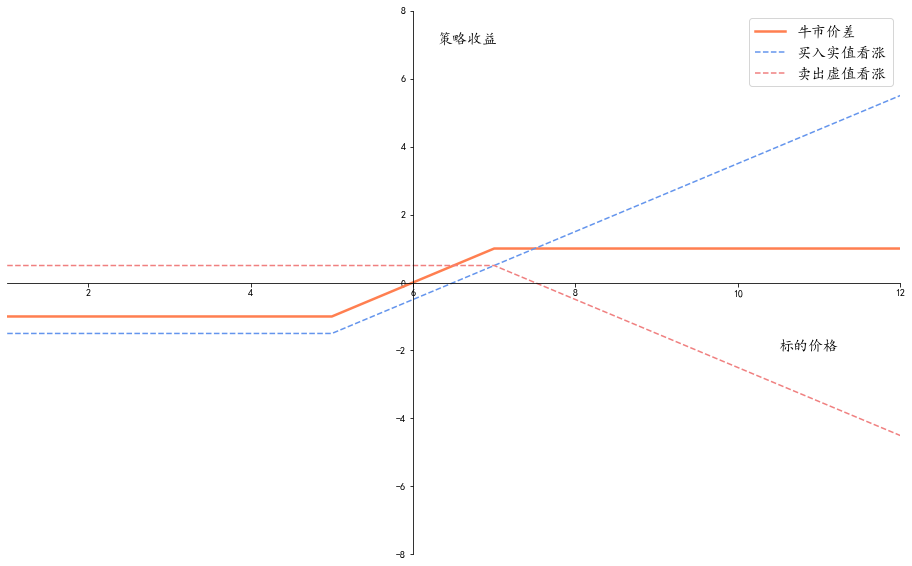

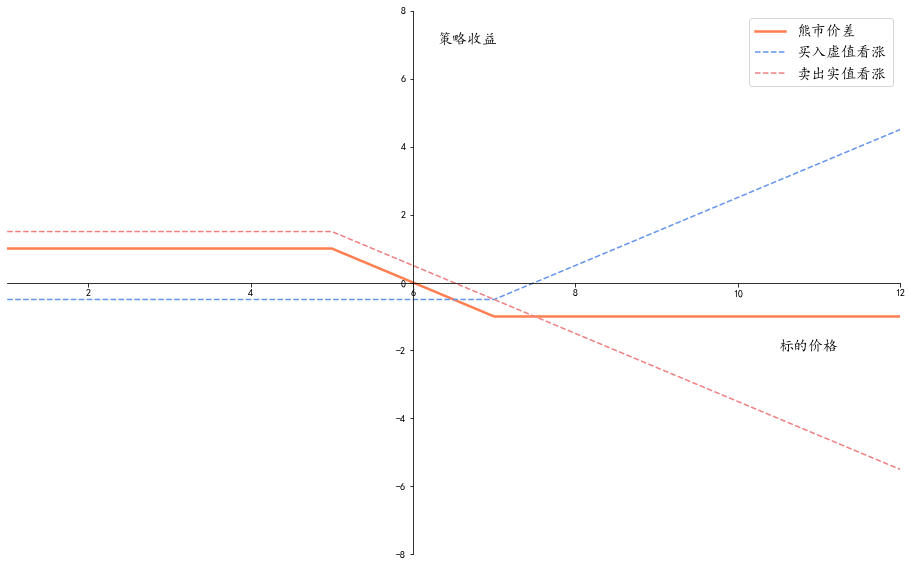

In [154]:
plt1 = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '牛市价差'))
plt2 = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '熊市价差'))

### 盒式价差 box spread 

是由执行价格为K1和K2的看涨期权所构成的牛市价差与一个具有相同执行价格看跌期权所构成的熊市价差的组合。

![12盒式价差](image\12盒式价差.png)

如表所示，盒式价差的贴现值为$(K_2-K_1)e^{-rT}$, 如果它的价值不同，就有套利机会。如果盒式价差的市场价格过低，买入盒式价差。买入行使价K1的看涨期权，买入行使价K2的看跌期权，卖出行使价K2的看涨期权，卖出行使价K1的看跌期权。如果盒式价差的市场价格过高，则卖出盒式。买入行使价K2的看涨期权，买入行使价K1的看跌期权，卖出行使价K1的看涨期权，卖出行使价K2的看跌期权。

### 蝶式策略 butterfly spread 

是一种高盈亏比、高杠杆的策略，适用于标的价格在一定范围内波动的情况。

#### 买入蝶式策略

用于区间震荡的策略，也属于利用波动率获利的策略。

其保护了两侧的风险，**买入蝶式看涨**是指同时买入一份实值看涨期权、卖出两份平值看涨期权、买入一份虚值看涨期权(行权价间隔相等，同时到期日一致)的策略。

**买入蝶式看跌**买入一份实值看跌期权、卖出两份平值看跌期权、买入一份虚值看跌期权，行权价间隔相等，到期日一致。

#### 卖出蝶式策略


是无方向趋势性策略，也属于利用波动率获利策略的一种。

**卖出看涨期权**是卖出一份实值看涨期权、买入两份平值看涨期权、卖出一份虚值看涨期权，行权价间隔相等，到期日一致。

**卖出看跌期权**是卖出一份实值看跌期权、买入两份平值看跌期权、卖出一份虚值看跌期权，行权价间隔相等，到期日一致。

它们的优点在于初始建立仓位没有成本投入并获得收入，为收入型策略。


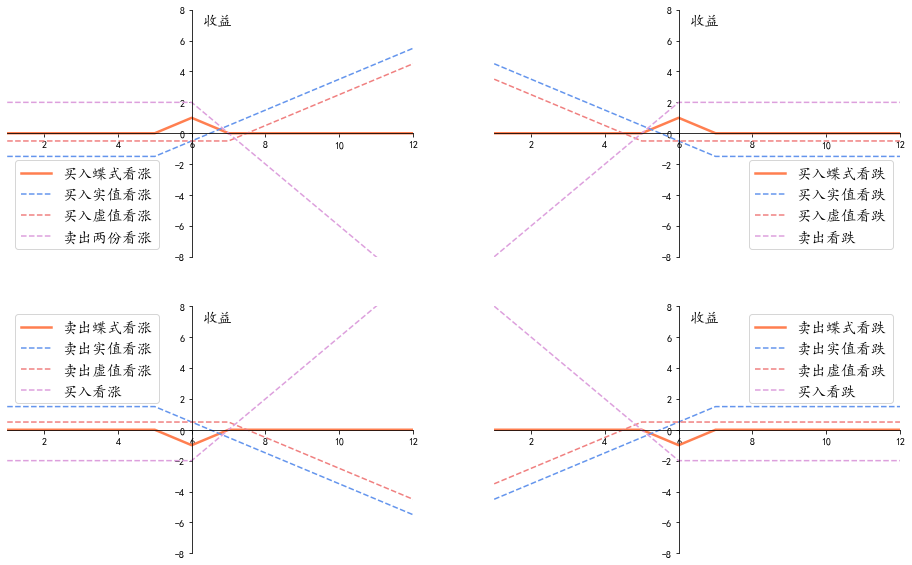

In [167]:
# 一共四个图，做成四个子图
plt.figure(figsize=(16, 10))
strategy_dict = option_strategy(6, price_list, 1, '买入蝶式看涨')
i = 1
for _ in ['买入蝶式看涨', '买入蝶式看跌', '卖出蝶式看涨', '卖出蝶式看跌']:
    plt.subplot(2, 2, i)
    plt.ylim(-8, 8)
    plt.xlim(1, 12)
    plt.plot(price_list, option_strategy(6, price_list, 1, _)['profit'], 'coral', label=_, lw=2.5)
    if _=='买入蝶式看涨':
        plt.plot(price_list, strategy_dict['long_call_in'], 'cornflowerblue', label='买入实值看涨', lw=1.5, linestyle='--')
        plt.plot(price_list, strategy_dict['long_call_out'], 'lightcoral', label='买入虚值看涨', lw=1.5, linestyle='--')
        plt.plot(price_list, 2 * strategy_dict['short_call'], 'plum', label='卖出两份看涨', lw=1.5, linestyle='--')
    if _=='买入蝶式看跌':
        plt.plot(price_list, strategy_dict['long_put_in'], 'cornflowerblue', label='买入实值看跌', lw=1.5, linestyle='--')
        plt.plot(price_list, strategy_dict['long_put_out'], 'lightcoral', label='买入虚值看跌', lw=1.5, linestyle='--')
        plt.plot(price_list, 2 * strategy_dict['short_put'], 'plum', label='卖出看跌', lw=1.5, linestyle='--')
    if _=='卖出蝶式看涨':
        plt.plot(price_list, strategy_dict['short_call_in'], 'cornflowerblue', label='卖出实值看涨', lw=1.5, linestyle='--')
        plt.plot(price_list, strategy_dict['short_call_out'], 'lightcoral', label='卖出虚值看涨', lw=1.5, linestyle='--')
        plt.plot(price_list, 2 * strategy_dict['long_call'], 'plum', label='买入看涨', lw=1.5, linestyle='--')
    if _=='卖出蝶式看跌':
        plt.plot(price_list, strategy_dict['short_put_in'], 'cornflowerblue', label='卖出实值看跌', lw=1.5, linestyle='--')
        plt.plot(price_list, strategy_dict['short_put_out'], 'lightcoral', label='卖出虚值看跌', lw=1.5, linestyle='--')
        plt.plot(price_list, 2 * strategy_dict['long_put'], 'plum', label='买入看跌', lw=1.5, linestyle='--')
    # 坐标轴设置
    ax = plt.gca()
    ax.spines['left'].set_position(('data',6))
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.legend(fontsize=15)
    plt.text(6.3, 7, '收益', fontsize=15)
    i += 1

plt.show()

#### 铁蝶式策略

能够从价格在一定范围内变动的股票中获利。，对后市波动率判断为低波动率。

买入铁蝶式期权组合时，首先会在支撑价位下交易牛市看跌价差期权组合，然后当价格反弹至远离阻力价位时，就可以采用熊市看涨价差期权组合，从而形成买入铁蝶式期权组合策略。

买入一份低行权价的看跌期权，卖出一份中间行权价的看跌期权，卖出一份中间行权价的看涨期权和买入具有较高行权价的认购期权。

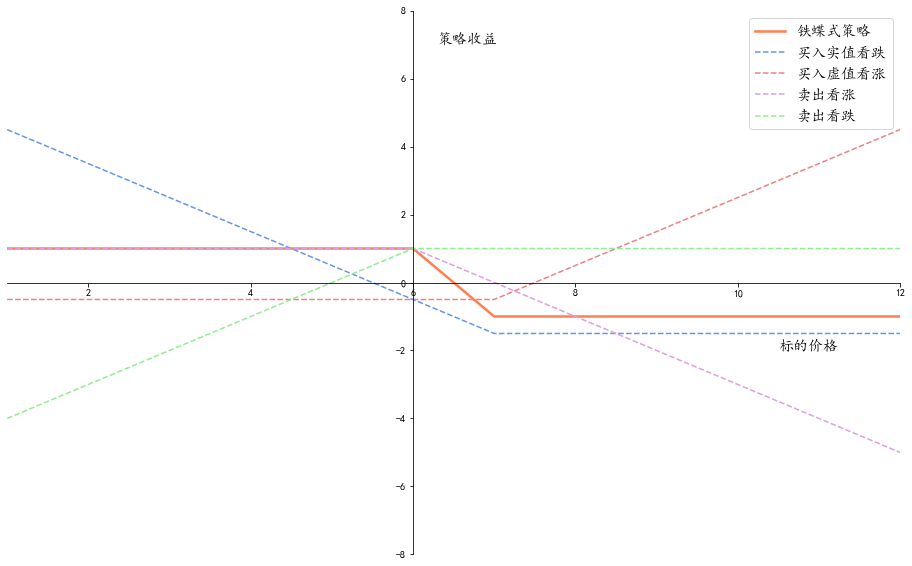

In [170]:
plt = draw_pic_strategy(price_list, option_strategy(6, price_list, 1, '铁蝶式策略'))  # 要求行权价价差不是等差数列，因此下图不是正确的图

### 鹰式策略

是一种市场中性策略，针对小幅震荡市场中任何趋势性的策略难以获利时，通过一个牛市价差和一个熊市价差组合构建的区间获利策略。

该策略以稍高的成本给予投资者宽于蝶式策略的获利区间，可分为铁鹰式策略和秃鹰式策略，前者会在初期带来收入，而后者会在初期进行支出。

#### 铁鹰式策略

预期标的在未来一段时间内不会发生太大变化，维持窄幅区间震荡，或者在事件风险发酵期，各种期权隐含波动率已经达到历史高点，均可卖出铁鹰式期权组合。

买入一份低行权价的虚值看跌期权，卖出一份中间价位较低行权价的虚值看跌期权，卖出一份中间价位较高行权价的虚值看涨期权，同时买入一份较高行权价的虚值看涨期权。

#### 秃鹰式策略

1. 买入一份低行权价看涨期权，卖出一份中低行权价看涨期权，卖出一份中高行权价看涨期权，买入一份高行权价看涨期权。
2. 买入一份低行权价看跌期权，卖出一份中低行权价看跌期权，卖出一份中高行权价看跌期权，买入一份高行权价看跌期权。

### 序列组合与带式组合 Strips and Straps

序列组合包括一个欧式看涨和两个欧式看跌的多头，行使价和到期日相同。一个带式组合由两个欧式看涨期权和一个欧式看跌期权的多头组成，其行权价格和到期日相同。

序列组合中，投资者认为价格会有大的变动，并认为下跌的可能性大于上涨。带式组合中，投资者也认为价格会有大的变动，但上涨的可能性大于下跌的可能性。

![16.5序列组合](image\16.5序列组合.png)

### 比率价差

是一个偏中性的策略，指买入一定数量的期权，卖出更多数量的期权（或者买入更多数量的期权），具有相同的标的物和相同的到期日，但行权价不同。

**比例价差**：可能认为卖出一个call会限制收益，那么可以买两份虚值看涨、卖一份平值看涨。

![比例价差](image\比例价差.jpg)

#### 看涨比率价差

**适用场景**：价格可能震荡，不会出现大涨行情。

**方法**：买入一定数量较低行权价(K1)的看涨期权，卖出更多数量的较高行权价(K2)的看涨期权，高行权价的保证金为M2。

**口诀**：全看涨，买低、比率卖高。

#### 看跌比率价差

**适用场景**：价格可能震荡，不会出现大跌行情。

**方法**：买入一定数量较高行权价(K2)的看跌期权，卖出更多数量的较低行权价(K1)的看跌期权，低行权价的保证金为M1。

**口诀**：全看跌，买高、比率卖低。

### 跨期策略

买卖不同到期日的合约，若行权价相等，则构成日历价差策略，若行权价不等，则构成对角线策略。

#### 日历价差策略

**方法**：卖出到期日较近的期权合约，买入相同数量、相同行权价、相同类型但到期日较远的期权合约。

**套利**：相同行权价的期权，近日合约的价值一定小于远日合约的价值，因此构建买入日历价差策略是净支出的，但如果定价错误，则可以套利。

![17日历价差](image\17日历价差.png)

![17日历价差2](image\17日历价差2.png)

笔记摘录整理自《3小时快学期权》、《2周攻克期权策略》、邢不行直播课、姜禄彬